# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `power law`: fits the generated image with a model consisting of `main lens`=`EPL` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing halo ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero
* `missing foreground shear`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with gamma_od fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [4]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'missing halo ellipticity',
            'lens_light': False,
            'number_of_images': 1,
            'MCMC': True,
            'job_name': 'baseline_minimal_missing_ellipticity_no_ll',
            'n_burn': 1000,
            'n_run': 2000}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.7, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [ ]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: missing halo ellipticity
Number of images: 1
Lens light: False
Starting MCMC


 94%|█████████▎| 2812/3000 [32:22<02:11,  1.43it/s]

In [4]:
from analosis.analysis.plots import Plots
p = Plots()
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'

### Image plot

Preparing image plot...


../../analosis/analysis/plots.py:69: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


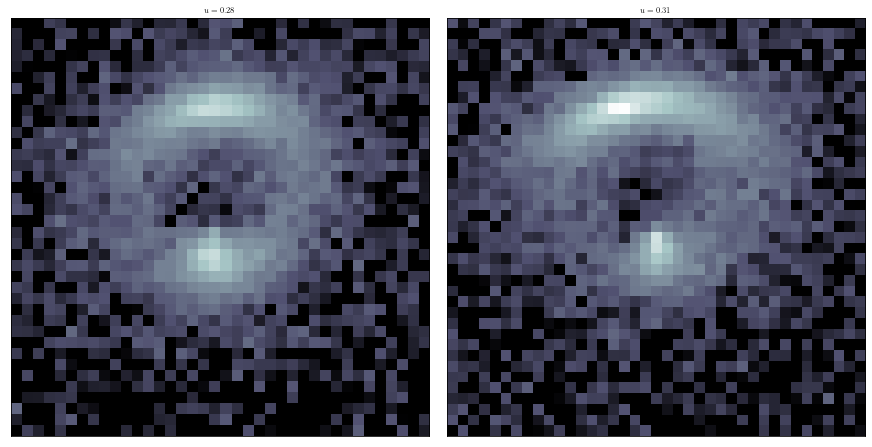

In [5]:
p.image_plot(path, settings, number_of_columns=2)

### Input vs output plot

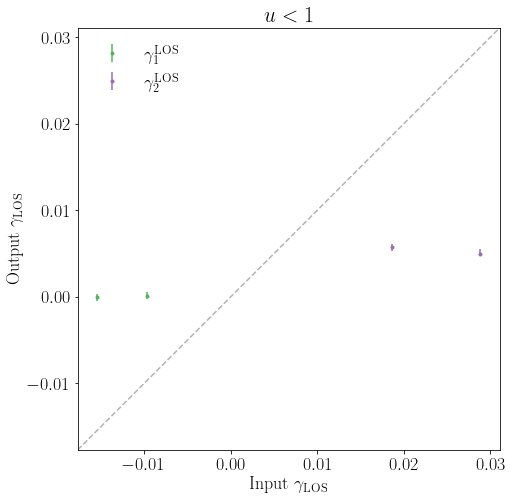

In [6]:
p.input_output_plot(path, settings, show_not_converged=True)

### Examine input kwargs

In [14]:
import pandas as pd
in_kwargs = pd.read_csv(path + '/datasets/baseline_no_ll_input_kwargs.csv')
in_kwargs

,kappa_os,gamma1_os,gamma2_os,omega_os,kappa_od,gamma1_od,gamma2_od,omega_od,kappa_ds,gamma1_ds,...,e1_sl,e2_sl,R_sersic_ll,n_sersic_ll,e1_ll,e2_ll,x_ll,y_ll,magnitude_ll,theta_E
0,0,0.023971,0.017367,0,0,0.001060,0.006702,0,0,0.016814,...,-0.101905,-0.336474,0.250373,4.448397,-0.023940,-0.022371,0.0,0.0,21.037315,0.916262
1,0,-0.019618,0.019797,0,0,-0.001753,0.008806,0,0,-0.008288,...,-0.402256,-0.016260,0.327352,5.731284,-0.050428,0.014938,0.0,0.0,21.113148,1.116429
2,0,0.021994,0.003135,0,0,-0.018378,0.003387,0,0,-0.024203,...,-0.044556,0.280236,0.364199,3.415352,-0.034886,0.000743,0.0,0.0,20.926665,1.181228
3,0,0.025647,0.006314,0,0,0.005534,0.018322,0,0,-0.010823,...,-0.031992,-0.119944,0.720301,3.526537,0.010784,0.036759,0.0,0.0,19.706869,2.056115
4,0,-0.001000,0.020057,0,0,-0.002216,0.010513,0,0,-0.013580,...,0.013787,-0.152306,0.292988,3.400203,-0.014641,-0.036216,0.0,0.0,20.966035,0.855256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,-0.013569,0.013101,0,0,0.012368,0.019943,0,0,0.018700,...,-0.179131,-0.172041,0.420824,3.471011,0.015163,-0.040305,0.0,0.0,20.440447,1.553190
96,0,0.020073,0.003855,0,0,0.011861,0.000570,0,0,0.016428,...,-0.132344,-0.129320,0.582159,3.540283,-0.003558,-0.013260,0.0,0.0,20.339855,1.891214
97,0,0.002996,0.008992,0,0,0.019078,0.014842,0,0,-0.020549,...,-0.286622,-0.447533,0.254974,3.474518,-0.008636,-0.002460,0.0,0.0,20.773491,0.957665
98,0,-0.014688,0.001792,0,0,-0.010828,0.001201,0,0,-0.016084,...,0.045952,0.015534,0.333301,4.027478,-0.029886,0.009090,0.0,0.0,20.783893,1.338620


In [16]:
out_kwargs = pd.read_csv(path + '/datasets/baseline_no_ll_output_kwargs.csv')
out_kwargs

,gamma1_od,gamma2_od,gamma1_os,gamma2_os,gamma1_ds,gamma2_ds
0,-0.001536,-0.007582,0.019159,0.017649,0.023453,0.011354
1,0.009505,0.017664,-0.033044,0.030319,-0.026270,0.013885
2,-0.029955,0.013820,0.014661,0.000197,-0.017324,0.019809
3,-0.004121,0.037317,0.036294,0.005854,-0.008214,-0.007560
4,0.010343,0.010549,0.002343,0.027784,-0.006163,0.016573
...,...,...,...,...,...,...
95,0.001166,0.018317,-0.017219,0.003558,0.008677,0.000198
96,0.001135,-0.023750,0.036114,0.007760,0.009528,0.006889
97,0.009700,0.012180,-0.002509,0.017760,-0.024478,0.012167
98,-0.032136,-0.000036,-0.025258,0.029818,0.000658,-0.007905
